In [16]:
import ipywidgets

In [17]:
uploader = ipywidgets.FileUpload(multiple=False)
uploader

FileUpload(value={}, description='Upload')

In [29]:
uploader.value

{'iris.csv': {'metadata': {'name': 'iris.csv',
   'type': 'text/csv',
   'size': 2400,
   'lastModified': 1608039283681},
  'content': b'5.1,3.5,1.4,0.2\n4.9,3.0,1.4,0.2\n4.7,3.2,1.3,0.2\n4.6,3.1,1.5,0.2\n5.0,3.6,1.4,0.2\n5.4,3.9,1.7,0.4\n4.6,3.4,1.4,0.3\n5.0,3.4,1.5,0.2\n4.4,2.9,1.4,0.2\n4.9,3.1,1.5,0.1\n5.4,3.7,1.5,0.2\n4.8,3.4,1.6,0.2\n4.8,3.0,1.4,0.1\n4.3,3.0,1.1,0.1\n5.8,4.0,1.2,0.2\n5.7,4.4,1.5,0.4\n5.4,3.9,1.3,0.4\n5.1,3.5,1.4,0.3\n5.7,3.8,1.7,0.3\n5.1,3.8,1.5,0.3\n5.4,3.4,1.7,0.2\n5.1,3.7,1.5,0.4\n4.6,3.6,1.0,0.2\n5.1,3.3,1.7,0.5\n4.8,3.4,1.9,0.2\n5.0,3.0,1.6,0.2\n5.0,3.4,1.6,0.4\n5.2,3.5,1.5,0.2\n5.2,3.4,1.4,0.2\n4.7,3.2,1.6,0.2\n4.8,3.1,1.6,0.2\n5.4,3.4,1.5,0.4\n5.2,4.1,1.5,0.1\n5.5,4.2,1.4,0.2\n4.9,3.1,1.5,0.1\n5.0,3.2,1.2,0.2\n5.5,3.5,1.3,0.2\n4.9,3.1,1.5,0.1\n4.4,3.0,1.3,0.2\n5.1,3.4,1.5,0.2\n5.0,3.5,1.3,0.3\n4.5,2.3,1.3,0.3\n4.4,3.2,1.3,0.2\n5.0,3.5,1.6,0.6\n5.1,3.8,1.9,0.4\n4.8,3.0,1.4,0.3\n5.1,3.8,1.6,0.2\n4.6,3.2,1.4,0.2\n5.3,3.7,1.5,0.2\n5.0,3.3,1.4,0.2\n7.0,3.2,4.7,1

In [30]:
has_data = False
if uploader.value:
    name = next(iter(uploader.value))
    upload = uploader.value[name]
    has_data = True

In [31]:
#upload['content']

In [32]:
import io
import numpy

In [33]:
if has_data:
    data = numpy.loadtxt(io.StringIO(upload['content'].decode()), delimiter=',')

In [34]:
k = ipywidgets.IntSlider(value=3, min=1, max=10)
k

IntSlider(value=3, max=10, min=1)

In [35]:
print("Detecting with k=%s"%k.value)

Detecting with k=3


In [36]:
from scipy.cluster.vq import kmeans, whiten, vq

In [37]:
if has_data:
    book, distortion = kmeans(whiten(data), k.value)
    book, distortion

In [38]:
if has_data:
    codes, distances = vq(whiten(data), book)

In [ ]:
if has_data:
    import matplotlib.pyplot as plt

In [46]:
import IPython
if has_data:
    xaxis = ipywidgets.IntSlider(value=0, min=0, max=data.shape[0])
    IPython.display.display(xaxis)
    print(xaxis)

IntSlider(value=0, max=150)

IntSlider(value=0, max=150)


In [ ]:
    yaxis = ipywidgets.IntSlider(value=1, min=0, max=data.shape[0]).value

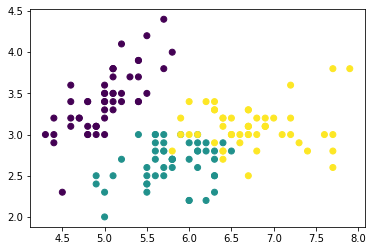

In [39]:
    plt.scatter(data[:,xaxis], data[:,yaxis], c=codes)